#### PYT-DS SAISOFT

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/kirbyurner/27963484878/in/album-72157693427665102/" title="Barry at Large"><img src="https://farm1.staticflickr.com/969/27963484878_b38f0db42a_m.jpg" width="240" height="180" alt="Barry at Large"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

# DATA SCIENCE WITH PYTHON


# Various Agglomerative Clustering on a 2D embedding of digits


An illustration of various linkage option for agglomerative clustering on
a 2D embedding of the digits dataset.

The goal of this example is to show intuitively how the metrics behave, and
not to find good clusters for the digits. This is why the example works on a
2D embedding.

What this example shows us is the behavior "rich getting richer" of
agglomerative clustering that tends to create uneven cluster sizes.
This behavior is especially pronounced for the average linkage strategy,
that ends up with a couple of singleton clusters.

In [1]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline

[```scipy.ndimage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html) is pretty out there, in terms of what it does, using spline interpolation and all.  Basically we're creating a "sort of" copy that's not an exact duplicate, more a close sibling, likely with a small distance in terms of clustering.

In [3]:
from sklearn import manifold, datasets

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print("n_samples before:", n_samples)

n_samples before: 1797


[```manifold.SpectralEmbedding```](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html) looks intriguing.  That gets used further on, after we've doubled the dataset with some clever "shadowing".

In [4]:
np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

n_samples, n_features = X.shape
print("n_samples after:", n_samples)

n_samples after: 3594


What are we doing there?  Along each row, each digit, we add some noise and create an "almost the same" digit, which tne gets added to X, making it twice as long.  Lets make sure we look at n_samples before and after.

In [5]:
np.random.normal(size=2)

array([ 1.33531628, -0.41327481])

In [6]:
print(X[1796]) 

[  0.   0.  10.  14.   8.   1.   0.   0.   0.   2.  16.  14.   6.   1.   0.
   0.   0.   0.  15.  15.   8.  15.   0.   0.   0.   0.   5.  16.  16.  10.
   0.   0.   0.   0.  12.  15.  15.  12.   0.   0.   0.   4.  16.   6.   4.
  16.   6.   0.   0.   8.  16.  10.   8.  16.   8.   0.   0.   1.   8.  12.
  14.  12.   1.   0.]


In [7]:
print(X[-1]) 

[  0.          -0.6551631    6.87685153  14.11484192  10.45593125
   2.44647107  -0.16783292   0.03227791   0.          -0.13708951
  12.66252253  16.87128218   7.94036894   4.10047989   0.96336657
  -0.14412311   0.          -1.1579147    8.34764552  16.29732153
  10.04165162  14.89617374   4.99843383  -0.71522998   0.          -0.23428826
   2.5344896   13.19240086  17.97687015  12.56116038   2.06923421
  -0.36463306   0.          -0.8870136    9.46850734  14.34321914
  12.29486665  14.26363784   4.46873282  -0.35452967   0.           2.24581647
  14.62446687  10.36394901   1.66153892  13.42864591  11.75802334
   0.85659708   0.           3.5426963   12.86427304  12.60712352
   9.03098527  14.2181202   10.26232596   0.83381263   0.           0.           0.
   0.           0.           0.           0.           0.        ]


Computing embedding
Done.
ward : 0.51s
average : 0.47s
complete : 0.46s


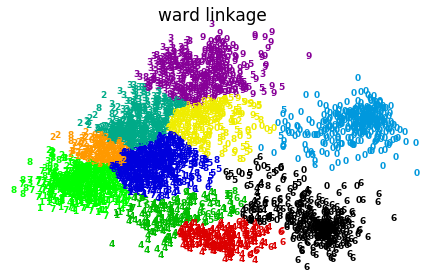

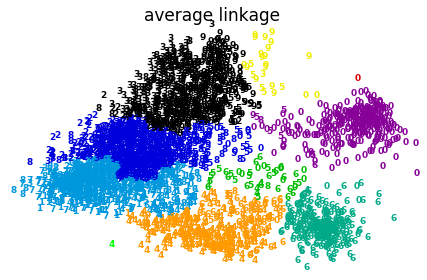

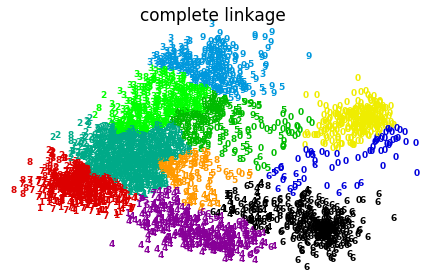

In [8]:
#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s : %.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)


plt.show()

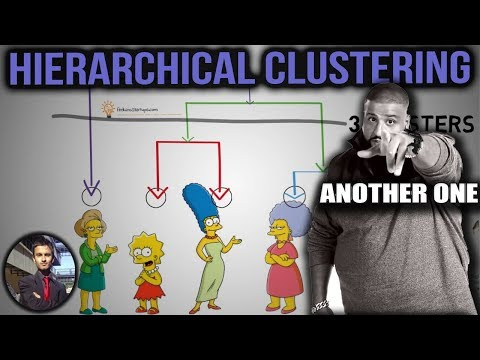

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo("EUQY3hL38cw")

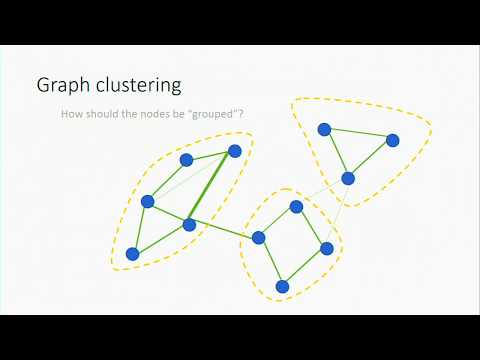

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("-Afa1WI3iug")